# STUDENT PERCENTAGE PREDICTION MODEL

To Explore Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.
What will be predicted score if a student study for 9.25 hrs in a day?

# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Reading data from the file

In [2]:
data=pd.read_csv('Students.csv')
data

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     19 non-null float64
Scores    19 non-null float64
dtypes: float64(2)
memory usage: 480.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,19.000000,19.000000
mean,4.836842,49.315789
std,2.672330,26.265847
min,1.100000,17.000000
25%,2.600000,26.000000
50%,4.500000,42.000000
75%,6.900000,71.000000
max,9.200000,95.000000


In [8]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
data.shape

(25, 2)

# Checking for the null values

In [10]:
data.isnull().any()

Hours     True
Scores    True
dtype: bool

In [11]:
data.isnull().sum()

Hours     6
Scores    6
dtype: int64

In [12]:
column_with_nan= data.columns[data.isnull().any()]

In [13]:
data.shape

(25, 2)

In [14]:
for column in column_with_nan:
    print(column,data[column].isnull().sum())

Hours 6
Scores 6


# Filling in the missing values

In [19]:
data['Hours'].fillna(data['Hours'].mean(),inplace=True)
data['Scores'].fillna(data['Scores'].mean(),inplace=True)
data

,Hours,Scores
0,2.500000,21.000000
1,5.100000,47.000000
2,3.200000,27.000000
3,8.500000,75.000000
4,3.500000,30.000000
5,1.500000,20.000000
6,9.200000,88.000000
7,5.500000,60.000000
8,8.300000,81.000000
9,2.700000,25.000000


Plotting the distribution of scores

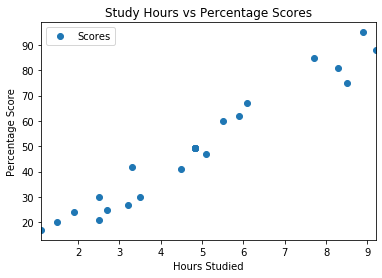

In [20]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Plotting regressor plot to determine the relationship between feature and target

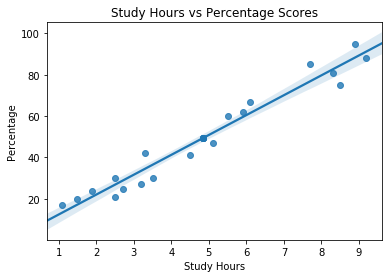

In [21]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

# Preparing our data

Next is to define our "attributes(input) variable and labels(output)"

In [22]:
X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

Now that we have the attributes and labels defined, the next step is to split this data into training and test sets.

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# Training the Algorithm

First I will be making our linear regression algorithm from scratch and then I will compare it with the built-in function sklearn.linear_model.LinearRegression()

In [24]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1]) # create a array containing only ones 
X_train_new = np.concatenate([ones, X_train],1) # concatenate the ones to X matrix

In [25]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [26]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [27]:
computeCost(X_train_new, y_train_new, theta)

1156.518608033241

In [28]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [29]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 3.087698601021869
Coefficient-  9.576634437981777
The final cost obtained after optimisation -  12.35638487424003


Let's plot our graph

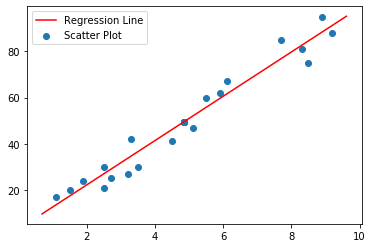

In [30]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [32]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.57661964]
Intercept -  3.087785684043247


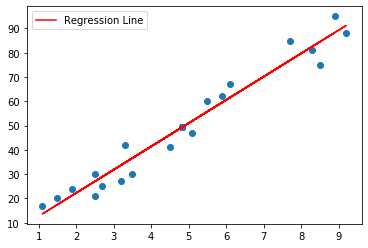

In [33]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

# Making Predictions

Since our trained model is ready, let's make some predictions.

In [34]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3       ]
 [2.5       ]
 [2.5       ]
 [4.83684211]
 [5.9       ]]


In [35]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81.000000,82.573729
1,30.000000,27.029335
2,21.000000,27.029335
3,49.315789,49.408383
4,62.000000,59.589842


In [36]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9509565618720349
Test Score: 0.9771246854923352


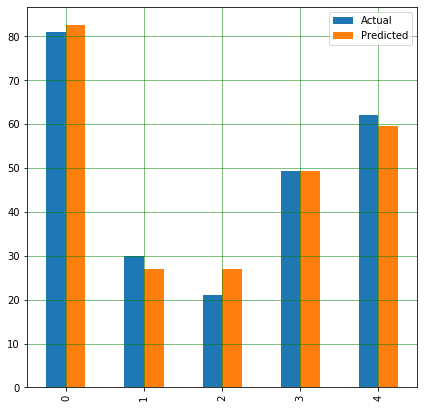

In [37]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [40]:
# Testing with some new data
hours = 5.6
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 5.6
Predicted Score = 56.71685568858256


# Evaluating the model

The last step is the evalaution of the performance of the algorithm.

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.6152960947487913
Mean Squared Error: 10.694357809995193
Root Mean Squared Error: 3.2702228991301485
R-2: 0.9771246854923352


NOTE: The accuracy of model is 96.78%.

# THANK YOU

Hope this model helped you to understand Simple linear regression. 